In [30]:
import matplotlib.pyplot as plt

## Глобальные переменные

In [2]:
# Перед тем, как создавать графики, настроим глобальные переменные, которые распространятся на них на всех
# сделаем это при помощи rcParams, все эти параметры уже имеют какое то изначальное значение, но мы можем поменять его под нужное нам 
# параметры также можно задавать локально, прописывая в структуре самого графика

In [3]:
# Размеры графиков в дюймах, [длина, высота]
plt.rcParams['figure.figsize'] = [8, 4]

In [4]:
# Тип шрифта
plt.rcParams['font.family'] = 'sans-serif'

In [5]:
# Отображается ли разрядная сетка на графике
plt.rcParams['axes.grid'] = True

In [6]:
# Цвет фона графика
plt.rcParams['axes.facecolor'] = '#EAEAF2'

In [7]:
# Толщина линий графика
plt.rcParams['lines.linewidth'] = 2

In [8]:
# Тип линии (например, обычная прямая или пунктирная)
plt.rcParams['lines.linestyle'] = '-'

In [9]:
# Цвет графика
plt.rcParams['lines.color'] = 'blue'

In [10]:
# Размер шрифта
plt.rcParams['font.size'] = 10

## Matplotlib

In [18]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_csv('data_new.csv')

In [22]:
data.head()

,user_id,date,utm_campaign,utm_source,register,pay
0,0,2022-12-20,новый_год,VK,1.0,0
1,1,2022-12-20,новый_год,YouTube,1.0,1
2,2,2022-12-20,новый_год,YouTube,1.0,0
3,3,2022-12-20,новый_год,YouTube,1.0,1
4,4,2022-12-20,новый_год,Одноклассники,0.0,0


In [42]:
data.shape

(500, 6)

In [43]:
# посчитаем кол-во новых пользователей, которые перешли по ссылке по датам

data_user_count = data   \
                .groupby('date', as_index=False) \
                .agg(user_count=('user_id', 'count'))

In [44]:
data_user_count

,date,user_count
0,2022-12-20,23
1,2022-12-21,22
2,2022-12-22,29
3,2022-12-23,26
4,2022-12-24,42
5,2022-12-25,44
6,2022-12-26,25
7,2022-12-27,32
8,2022-12-28,28
9,2022-12-29,28


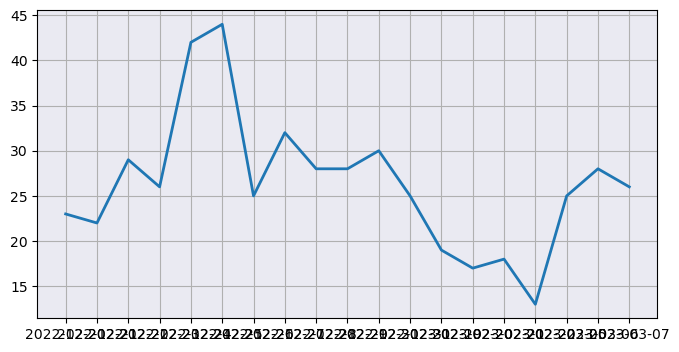

In [17]:
# Создание графика
plt.plot('date', 'user_count', data = data_user_count)
# Вывод графика
plt.show()

### График с настройкой элементов

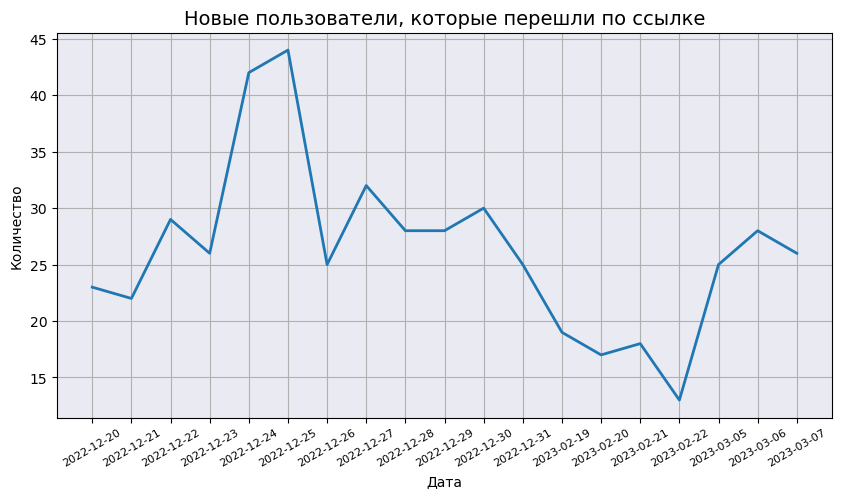

In [18]:
# Задаем размер графика
plt.figure(figsize=(10,5)) # увеличим размер графика
plt.plot('date', 'user_count', data = data_user_count)
# Заголовок
plt.title(label = 'Новые пользователи, которые перешли по ссылке', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30) # rotation кол-во градусов, на которое повернуть, fontsize размер шрифта
# Название оси X
plt.xlabel(xlabel='Дата', fontsize=10)
# Название оси Y
plt.ylabel('Количество', fontsize=10)
plt.show()

### График с текстовыми подписями

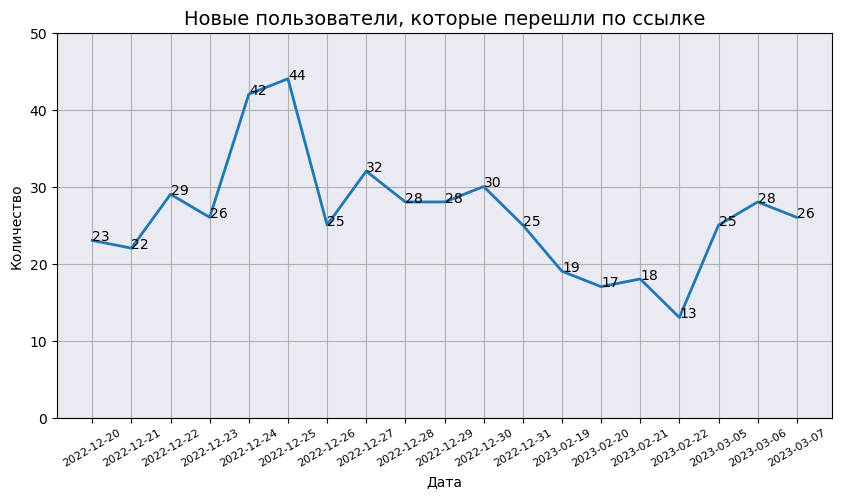

In [19]:
# Задаем размер графика
plt.figure(figsize=(10,5))
x = data_user_count['date']
y = data_user_count['user_count']
plt.plot(x, y)
# Заголовок
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Дата', fontsize=10)
# Название оси Y
plt.ylabel('Количество', fontsize=10)
# Задаем сами значения оси y
plt.ylim(bottom=0, top=50)
# Подписываем значения на графике
for i, j in zip(x, y): # колонку с датами запишем в x, а колонку со значениями в y
    plt.annotate(str(j), xy=(i, j)) # в функцию annotate передаем параметр str(j) для вывода, xy=(i, j) данные на графике, где появится подпись
plt.show()

### Несколько линий

In [45]:
data.head(2)

,user_id,date,utm_campaign,utm_source,register,pay
0,0,2022-12-20,новый_год,VK,1.0,0
1,1,2022-12-20,новый_год,YouTube,1.0,1


In [46]:
data_user_by_source = data \
        .groupby(['date', 'utm_source'], as_index=False) \
        .agg(user_count=('user_id', 'count'))

In [47]:
data_user_by_source

,date,utm_source,user_count
0,2022-12-20,VK,6
1,2022-12-20,YouTube,11
2,2022-12-20,Одноклассники,6
3,2022-12-21,VK,7
4,2022-12-21,YouTube,9
5,2022-12-21,Одноклассники,6
6,2022-12-22,VK,10
7,2022-12-22,YouTube,10
8,2022-12-22,Одноклассники,9
9,2022-12-23,VK,9


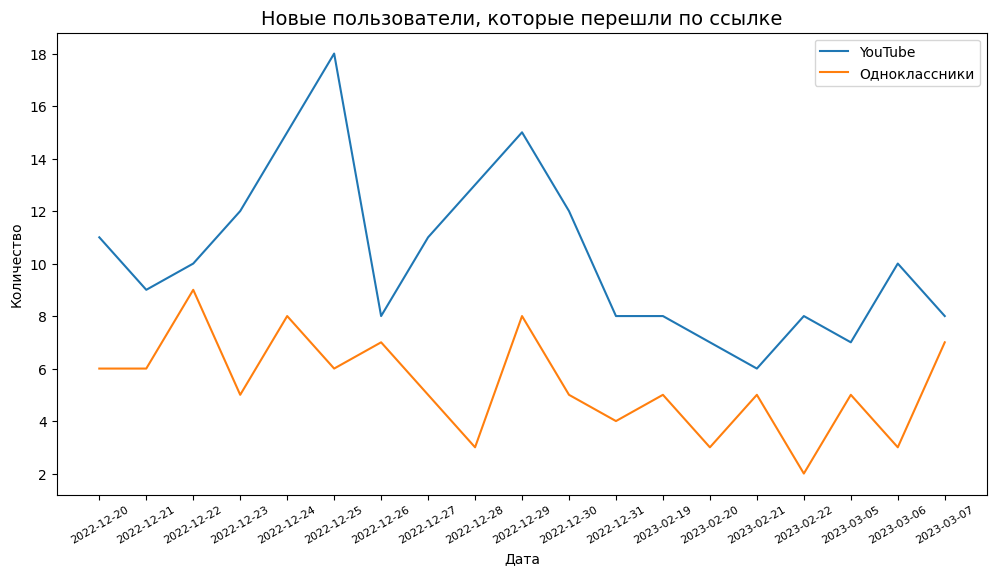

In [21]:
plt.figure(figsize=(12,6))
# Линия для пользователей с youtube
plt.plot('date', 'user_count', 
         data = data_user_by_source[data_user_by_source.utm_source=='YouTube'], 
         label='YouTube')  # label это обозначение линии, которое пойдет в легенду
# Линия для пользователей с одноклассников
plt.plot('date', 'user_count', 
         data = data_user_by_source[data_user_by_source.utm_source=='Одноклассники'], 
         label='Одноклассники')
# Заголовок
plt.title(label = 'Новые пользователи, которые перешли по ссылке', fontsize=14) # label — название, fontsize — размер шрифта
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)  # xticks — функция для работы с подписями значений на оси X, rotation — на сколько градусов будут повёрнуты подписи, fontsize — размер шрифта 
# Название оси X
plt.xlabel('Дата', fontsize=10)  # функция для работы с названием оси X
# Название оси Y
plt.ylabel('Количество', fontsize=10)
# Легенда
plt.legend()
plt.show()

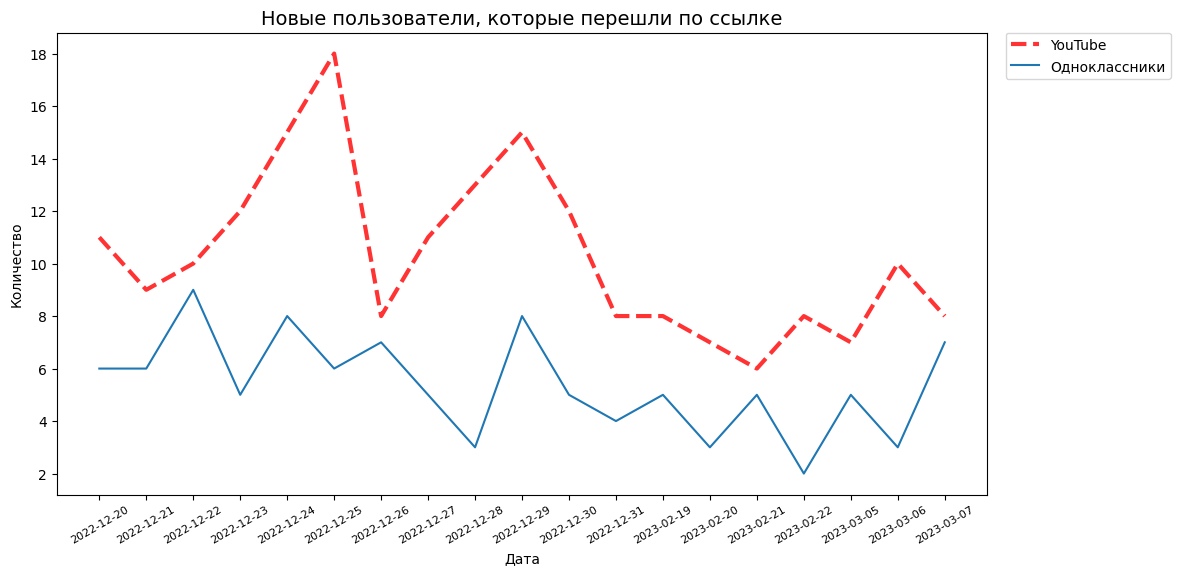

In [23]:
plt.figure(figsize=(12,6))
# Настроенная линия для пользователей с youtube
plt.plot('date', 'user_count', 
         data = data_user_by_source[data_user_by_source.utm_source=='YouTube'], 
         label='YouTube', 
         linestyle='--', alpha=0.8, color='red', linewidth=3) # color цвет, linestyle стиль, linewidth ширина, alpha более прозрачный 
# Линия для пользователей с одноклассников
plt.plot('date', 'user_count', 
         data = data_user_by_source[data_user_by_source.utm_source=='Одноклассники'], 
         label='Одноклассники')
# Заголовок
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Дата', fontsize=10)
# Название оси Y
plt.ylabel('Количество', fontsize=10)
# Легенда с координатами
plt.legend(loc=(1.02, 0.9))
plt.show()

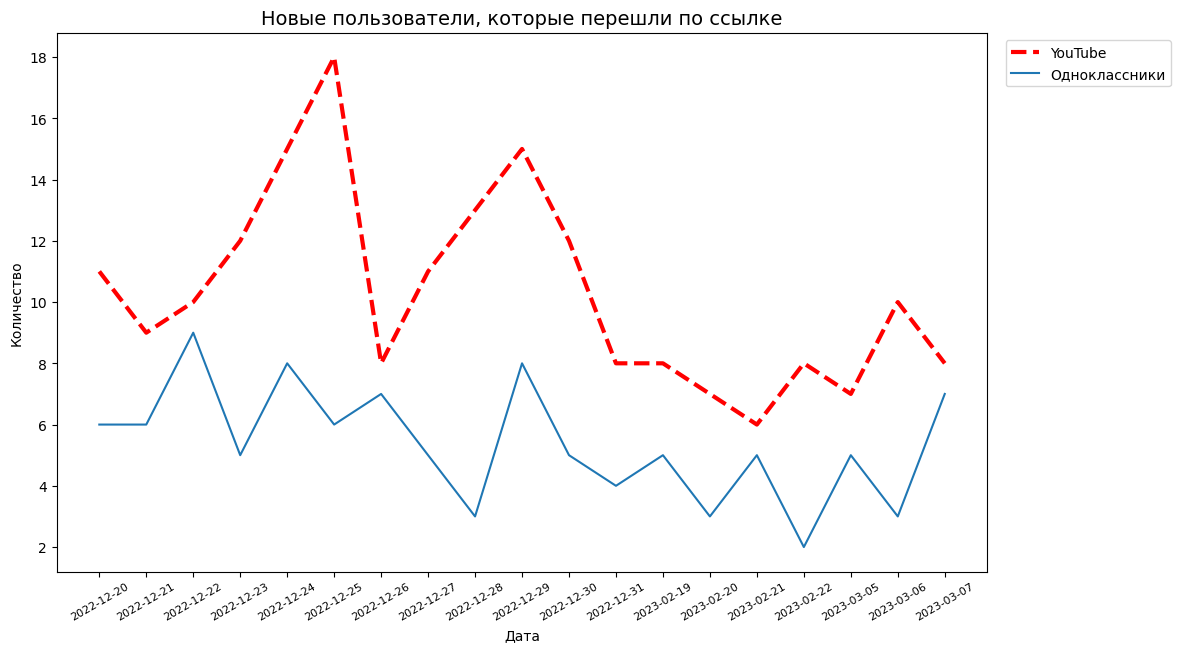

In [25]:
plt.figure(figsize=(12,7))
# Настроенная линия для пользователей с youtube
plt.plot('date', 'user_count', 
         data = data_user_by_source[data_user_by_source.utm_source=='YouTube'], 
         label='YouTube', linestyle='--', color='red', linewidth=3)
# Линия для пользователей с одноклассников
plt.plot('date', 'user_count', 
         data = data_user_by_source[data_user_by_source.utm_source=='Одноклассники'], label='Одноклассники')
# Заголовок
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Дата', fontsize=10)
# Название оси Y
plt.ylabel('Количество', fontsize=10)
# Легенда с координатами
plt.legend(loc=(1.02, 0.9))
# Сохранение графика
plt.savefig(fname = 'График', bbox_inches='tight') # сохранение графика и путь для сохранения

### Второй способ создания графиков

In [28]:
# сначала создадим объект fig и ax
# fig это полный фрейм, в котором будут располагаться графики
# ax это конкретная область на фрейме, на котором они будут отрисовываться 
# все функции указанные ниже, применяются к ax
# с пом. fig можно создавать области с несколькими графиками рядом (например, один слева, второй справа)

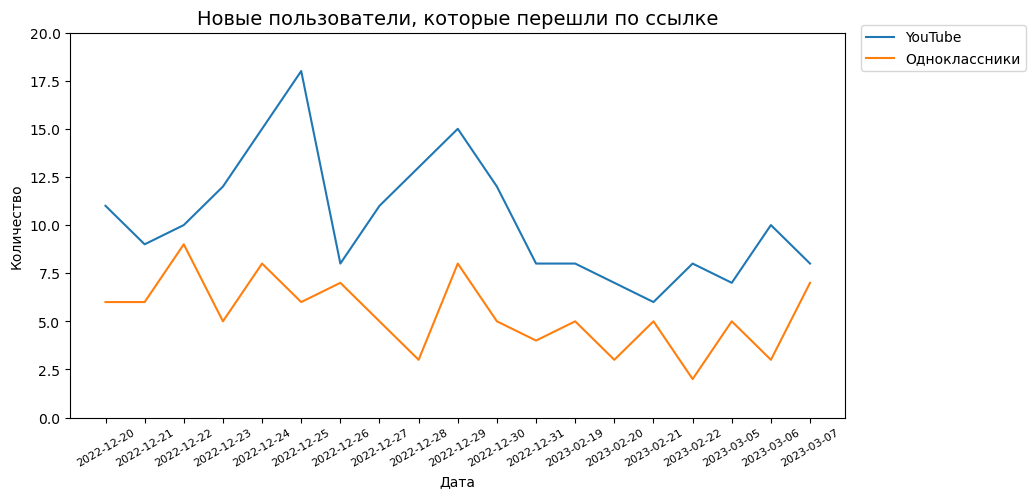

In [29]:
# Создание графика и осей
fig, ax = plt.subplots(figsize=(10, 5))
# Линия для пользователей с youtube
ax.plot('date', 'user_count', 
        data = data_user_by_source[data_user_by_source.utm_source=='YouTube'], 
        label='YouTube')
# Линия для пользователей с одноклассников
ax.plot('date', 'user_count', 
        data = data_user_by_source[data_user_by_source.utm_source=='Одноклассники'], 
        label='Одноклассники')
# Заголовок
ax.set_title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Поворачиваем подписи на оси x
ax.tick_params(axis='x', labelrotation=30, labelsize=8)
# Название оси X
ax.set_xlabel('Дата', fontsize=10)
# Название оси Y 
ax.set_ylabel('Количество', fontsize=10)
ax.set_ylim(bottom=0, top=20)
# Легенда с координатами
ax.legend(loc=(1.02, 0.9))
plt.show()

## Типы графиков и несколько графиков

### Типы графиков

Линейный график - наиболее используемый тип графика. Используется для отображения изменений значений на протяжении времени или от другой переменной. Задается с помощью plot

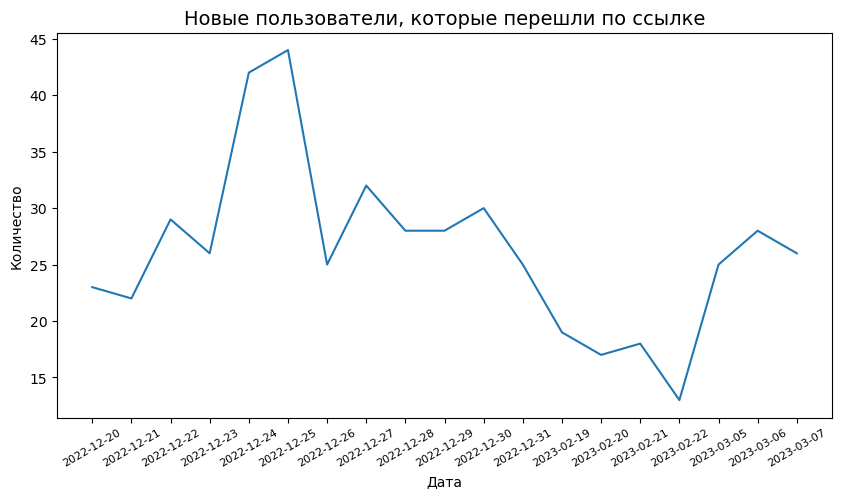

In [30]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем линию
plt.plot('date', 'user_count', data = data_user_count)
# Заголовок
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Дата', fontsize=10)
# Название оси Y
plt.ylabel('Количество', fontsize=10)
plt.show()

Гистограмма - это график, который показывает распределение данных. Задается с помощью hist

In [48]:
films_rating = pd.read_csv('films_rating.csv')

In [49]:
films_rating.head()

,film_id,avg_user_rating,avg_critic_rating,genre,count_views
0,1,2.721637,2.610947,комедия,289
1,2,4.479032,3.494201,комедия,880
2,3,3.660454,2.705474,боевик,305
3,4,3.255049,2.470094,драма,263
4,5,2.346889,2.336517,боевик,712


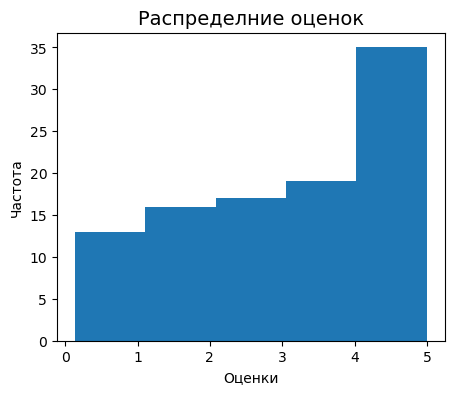

In [34]:
# Задаем размер графика
plt.figure(figsize=(5,4))
# Рисуем гистограмму
plt.hist(films_rating['avg_user_rating'], bins=5)  # bins это кол-во столбцов
# Заголовок
plt.title('Распределние оценок', fontsize=14)
# Название оси X
plt.xlabel('Оценки')
# Название оси Y
plt.ylabel('Частота')
plt.show()

In [ ]:
# столбец показывает кол-во оценок, который лежит в диапазоне, например, от 0 до 1 показывает кол-во оценок от нуля до единицы

In [ ]:
# на гистограмме бывает удобно вывести среднее всех значений

Линия по координате - это график, который рисует прямую линию по указанной оси. Задается с помощью axvline

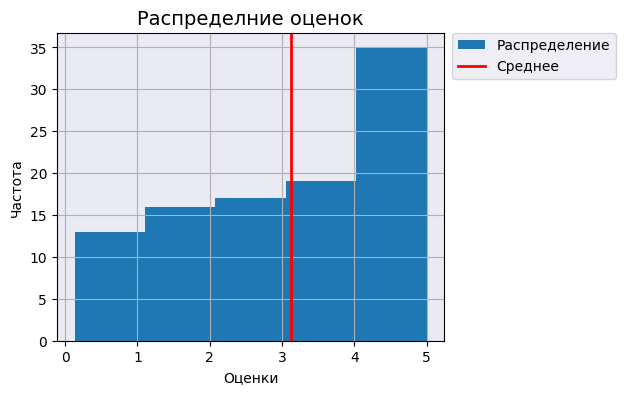

In [ ]:
# Задаем размер графика
plt.figure(figsize=(5,4))
# Рисуем гистограмму
plt.hist(films_rating['avg_user_rating'], bins=5, label='Распределение')
# Рисуем среднее
plt.axvline(x=films_rating['avg_user_rating'].mean(), color='red', label='Среднее')
# Заголовок
plt.title('Распределние оценок', fontsize=14)
# Название оси X
plt.xlabel('Оценки')
# Название оси Y
plt.ylabel('Частота')
# Легенда
plt.legend(loc=(1.02, 0.85))
plt.show()

In [50]:
films_rating.head(2)

,film_id,avg_user_rating,avg_critic_rating,genre,count_views
0,1,2.721637,2.610947,комедия,289
1,2,4.479032,3.494201,комедия,880


Точечный график – график в виде точек, используется для отображения зависимости между двумя переменными. Задается с помощью scatter.

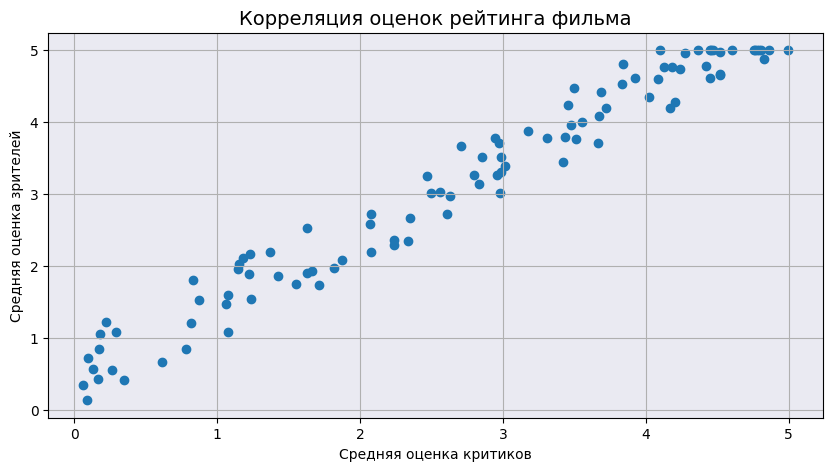

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем точечный график
plt.scatter(x = films_rating['avg_critic_rating'], y = films_rating['avg_user_rating'])
# Название
plt.title('Корреляция оценок рейтинга фильма', fontsize=14)
# Подпись к оси X
plt.xlabel('Средняя оценка критиков')
# Подпись к оси Y
plt.ylabel('Средняя оценка зрителей')
plt.show()

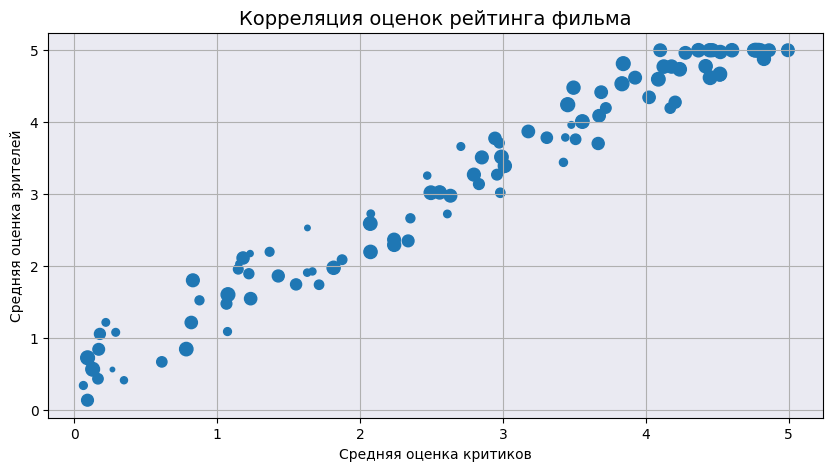

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем точечный график
plt.scatter(x = films_rating['avg_critic_rating'], y = films_rating['avg_user_rating'], 
            s=films_rating['count_views']/10) # s настроить размер точек в зависимости от какого то значения (кол-во просмотров)
# Название
plt.title('Корреляция оценок рейтинга фильма', fontsize=14)
# Подпись к оси X
plt.xlabel('Средняя оценка критиков')
# Подпись к оси Y
plt.ylabel('Средняя оценка зрителей')
plt.show()

Столбчатая диаграмма – это график в виде столбцов, используется для сравнения значений нескольких категорий. Задается с помощью функции bar.

In [51]:
data.head(2)

,user_id,date,utm_campaign,utm_source,register,pay
0,0,2022-12-20,новый_год,VK,1.0,0
1,1,2022-12-20,новый_год,YouTube,1.0,1


In [52]:
# хотим сравнить откуда пришло больше, соединим эти две метки в одну

data['utms'] = data['utm_campaign']+'_'+data['utm_source']
data['utms']

0                 новый_год_VK
1            новый_год_YouTube
2            новый_год_YouTube
3            новый_год_YouTube
4      новый_год_Одноклассники
                ...           
495                 8_марта_VK
496      8_марта_Одноклассники
497      8_марта_Одноклассники
498                 8_марта_VK
499            8_марта_YouTube
Name: utms, Length: 500, dtype: object

In [53]:
data_utm_count = data.groupby('utms', as_index=False).agg(utms_count=('user_id', 'count'))
data_utm_count

,utms,utms_count
0,23_февраля_VK,23
1,23_февраля_YouTube,29
2,23_февраля_Одноклассники,15
3,8_марта_VK,39
4,8_марта_YouTube,25
5,8_марта_Одноклассники,15
6,новый_год_VK,140
7,новый_год_YouTube,142
8,новый_год_Одноклассники,72


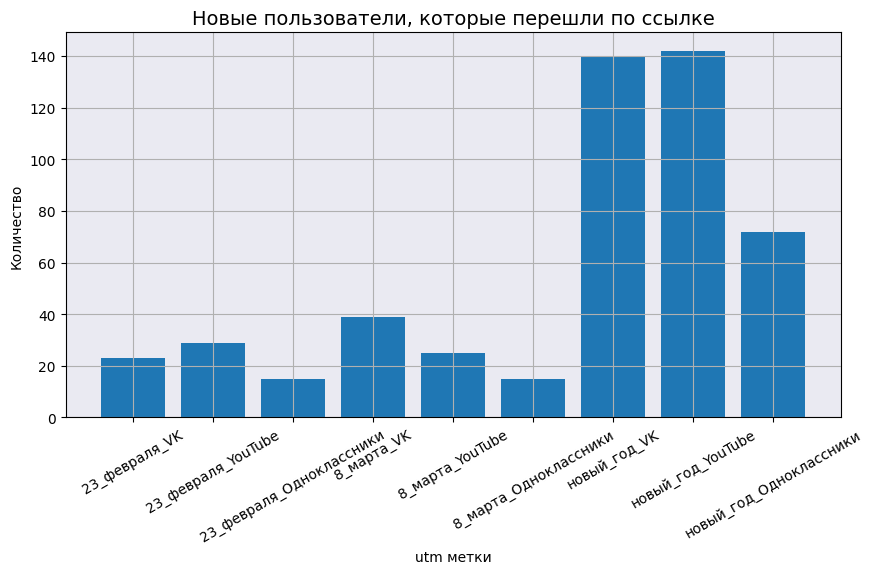

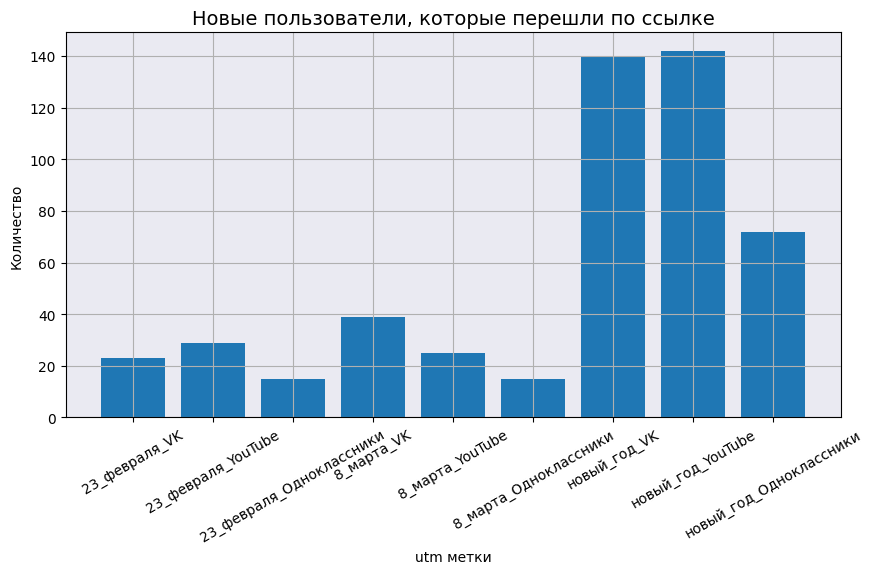

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем столбчатый график
plt.bar(data_utm_count['utms'], data_utm_count['utms_count'])
# Название
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Подпись к оси X
plt.xticks(rotation=30)
plt.xlabel('utm метки')
# Подпись к оси Y
plt.ylabel('Количество')
plt.show()

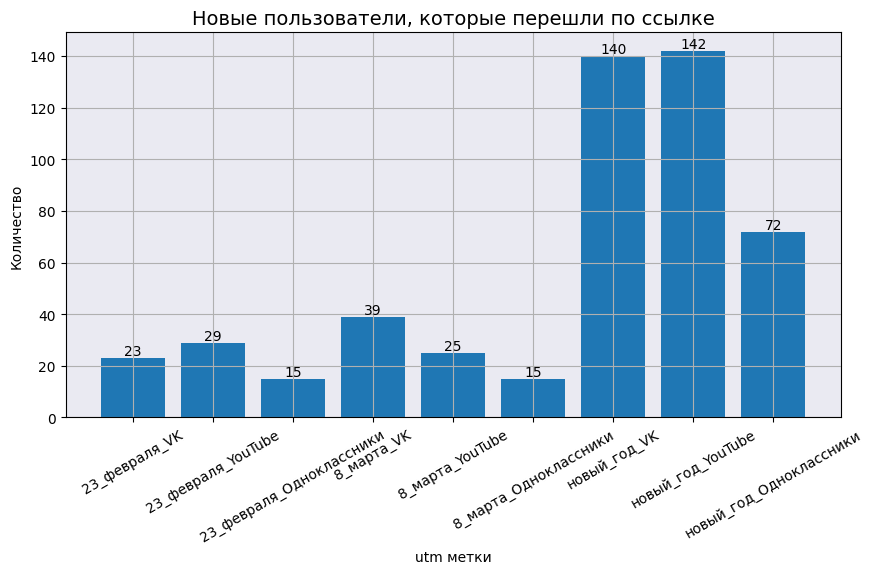

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем столбчатый график
plt.bar(data_utm_count['utms'], data_utm_count['utms_count'])
# Название
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Поворачиваем подписи к оси X
plt.xticks(rotation=30)
# Подпись к оси X
plt.xlabel('utm метки')
# Подпись к оси Y
plt.ylabel('Количество')
# Добавление подписей
for i, val in enumerate(data_utm_count['utms_count']): # добавление подписи значения над столбцом
    plt.text(i, val+1, str(val), ha='center')  # val+1 это нужно, чтобы подпись была немного выше столбца
plt.show()

Перевернутая столбчатая диаграмма -  используется для представления значений по возрастанию/убыванию. Задается с помощью функции barh.

In [ ]:
data_utm_count.sort_values(by='utms_count', inplace=True)

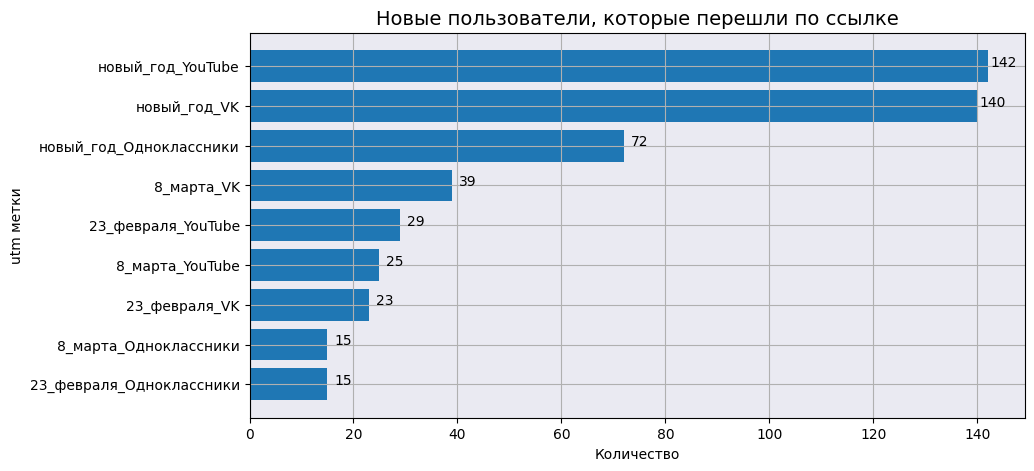

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем перевернутый столбчатый график
plt.barh(data_utm_count['utms'], data_utm_count['utms_count'])
# Название
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Подпись к оси X
plt.xlabel('Количество')
# Подпись к оси Y
plt.ylabel('utm метки')
# Добавление подписей
for i, val in enumerate(data_utm_count['utms_count']):
    plt.text(x = val+3, y =i, s=str(val), ha='center')
plt.show()

#### Воронка

In [ ]:
# с помощью столбчатых диаграмм удобно строить воронки
# для этого нужно расположить столбцы друг за другом в порядке убывания

In [54]:
data.head(2)

,user_id,date,utm_campaign,utm_source,register,pay,utms
0,0,2022-12-20,новый_год,VK,1.0,0,новый_год_VK
1,1,2022-12-20,новый_год,YouTube,1.0,1,новый_год_YouTube


In [55]:
data_counts = data.groupby('utms', as_index=False).agg(
    all_count=('user_id','count'), 
    register_count=('register','sum'), 
    pay_count=('pay','sum')
)

In [56]:
data_counts.head()

,utms,all_count,register_count,pay_count
0,23_февраля_VK,23,19.0,2
1,23_февраля_YouTube,29,21.0,17
2,23_февраля_Одноклассники,15,6.0,4
3,8_марта_VK,39,27.0,10
4,8_марта_YouTube,25,17.0,14


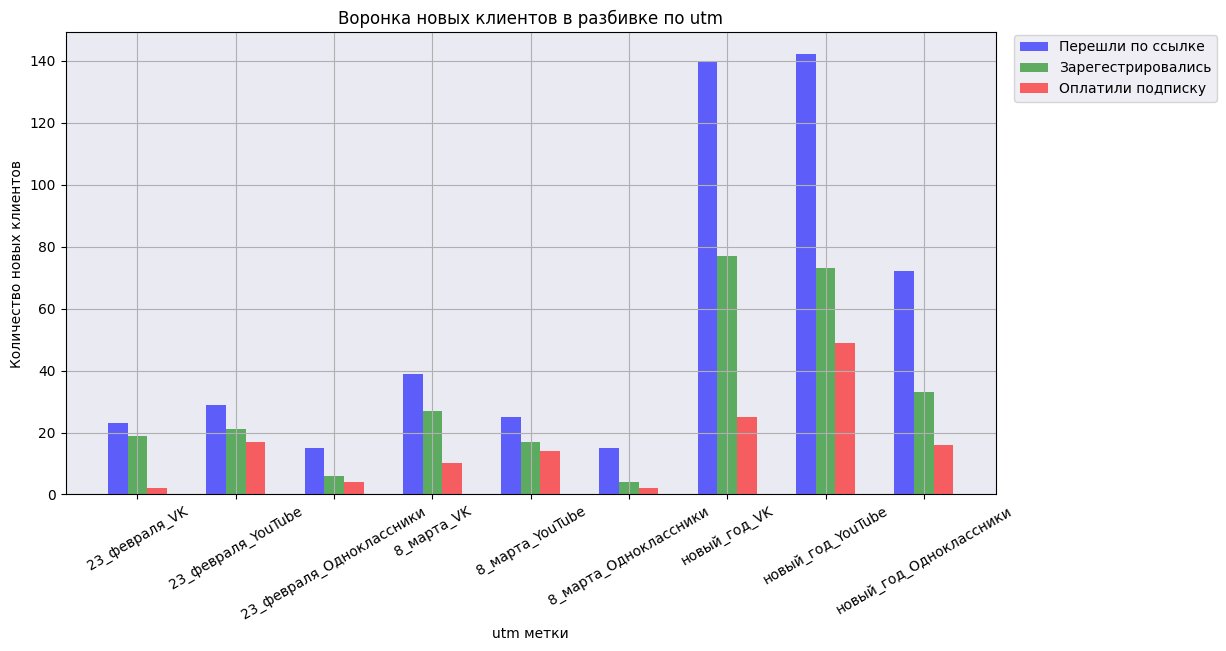

In [ ]:
# Данные в переменные
utms = data_counts.utms
all_count = data_counts.all_count
register_count = data_counts.register_count
pay_count = data_counts.pay_count

# Настройка параметров графика
bar_width = 0.2   # ширина столбца
index = np.arange(len(utms)) # переменная с индексами (нужна, чтобы сдвигать столбцы по оси X)

# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(12,6))

# Нарисовать столбцы                     # столбцы друг за другом в порядке убывания
ax.bar(index, all_count, bar_width,      # индекс, значение, ширина столбца
                color='blue', alpha=0.6,
                label='Перешли по ссылке')
ax.bar(index + bar_width, register_count, bar_width, # index + bar_width прибавляем ширину столбца, чтобы столбец был правее первого
                color='green', alpha=0.6,
                label='Зарегестрировались')
ax.bar(index + 2 * bar_width, pay_count, bar_width,  # здесь две ширины
                color='red', alpha=0.6,
                label='Оплатили подписку')

# Настройка осей и заголовка
ax.set_xlabel('utm метки')
ax.set_ylabel('Количество новых клиентов')
ax.set_title('Воронка новых клиентов в разбивке по utm')
# Указываем место для подписей
ax.set_xticks(index + bar_width)
# Указываем название подписей (иначе отразятся индексы)
ax.set_xticklabels(utms)
# Поворачиваем подпись на осях
ax.tick_params(axis='x', labelrotation=30)
# Легенда
ax.legend(loc=(1.02, 0.85))
# Отображение графика
plt.show()

#### Стекнутый

In [ ]:
# столбцы можно ставить не только рядом друг с другом, но и один на другой (разбить столбцы на категории)

In [57]:
data_counts_2 = data_counts.copy()

In [58]:
data_counts_2[:2]

,utms,all_count,register_count,pay_count
0,23_февраля_VK,23,19.0,2
1,23_февраля_YouTube,29,21.0,17


In [59]:
data_counts_2['only_register'] = data_counts_2['register_count']-data_counts_2['pay_count']
data_counts_2.rename(columns={'pay_count':'register_and_pay'}, inplace=True)
data_counts_2['dont_register'] = (
    data_counts_2['all_count']-(data_counts_2['register_and_pay']+data_counts_2['only_register'])
)
data_counts_2 = data_counts_2[['utms', 'dont_register', 'only_register', 'register_and_pay']]

In [60]:
data_counts_2

,utms,dont_register,only_register,register_and_pay
0,23_февраля_VK,4.0,17.0,2
1,23_февраля_YouTube,8.0,4.0,17
2,23_февраля_Одноклассники,9.0,2.0,4
3,8_марта_VK,12.0,17.0,10
4,8_марта_YouTube,8.0,3.0,14
5,8_марта_Одноклассники,11.0,2.0,2
6,новый_год_VK,63.0,52.0,25
7,новый_год_YouTube,69.0,24.0,49
8,новый_год_Одноклассники,39.0,17.0,16


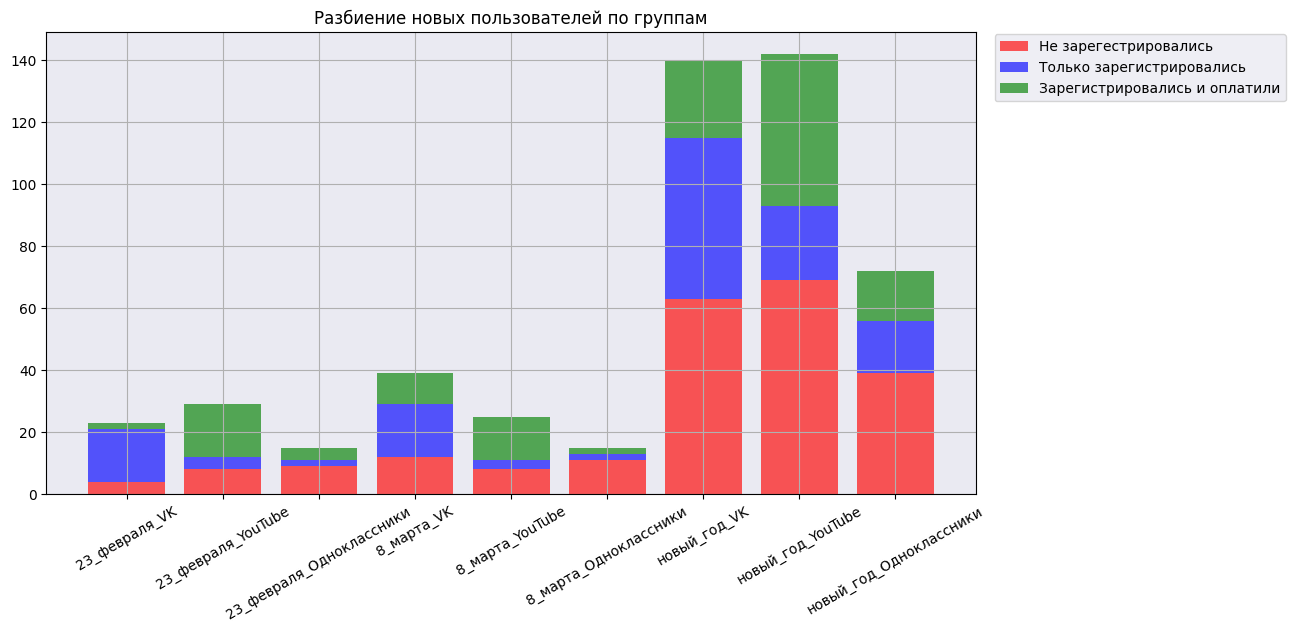

In [ ]:
# Данные в переменные
utms = data_counts_2.utms
dont_register = data_counts_2.dont_register
only_register = data_counts_2.only_register
register_and_pay = data_counts_2.register_and_pay

# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(12,6))
# Нарисовать столбцы
ax.bar(utms, dont_register, color='red', alpha=0.65, label='Не зарегестрировались') 
ax.bar(utms, only_register, bottom=dont_register, # bottom=dont_register показывает начало столбца по координате Y (второй на первом)
       color='blue', alpha=0.65, 
       label='Только зарегистрировались')
ax.bar(utms, register_and_pay, bottom=dont_register+only_register, # bottom=dont_register+only_register сумма первых двух, т.о. столбцы друг на друге
       color='green', alpha=0.65, 
       label='Зарегистрировались и оплатили')

# Настраиваем легенду и заголовок
ax.legend(loc=(1.02, 0.85))
ax.set_title('Разбиение новых пользователей по группам')
# Поворачиваем подпись на осях
ax.tick_params(axis='x', labelrotation=30)

plt.show()

Круговая диаграмма – график в виде круга, используется для соотношений долей от целого. Задается с помощью pie

In [61]:
data_utm_count.sort_values(by='utms_count', inplace=True)

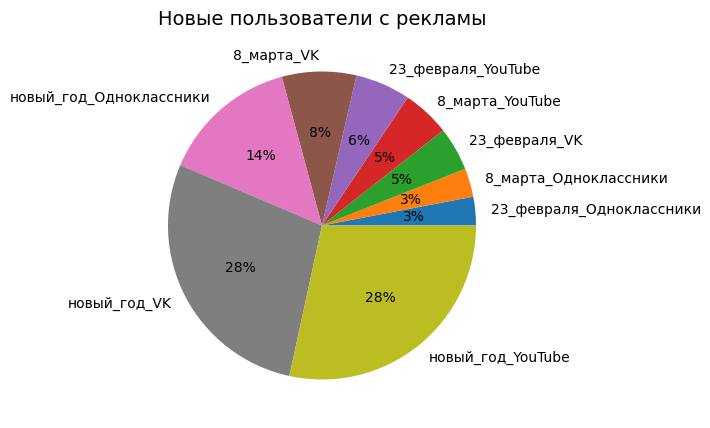

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем круговую диаграмму
plt.pie(data_utm_count['utms_count'], labels = data_utm_count['utms'], autopct='%.0f%%') # autopct подписи прямо на диаграмме 
# Задаем название                                                              # '%.0f%%' формат подписи процентный  
plt.title('Новые пользователи с рекламы', fontsize=14)
plt.show()

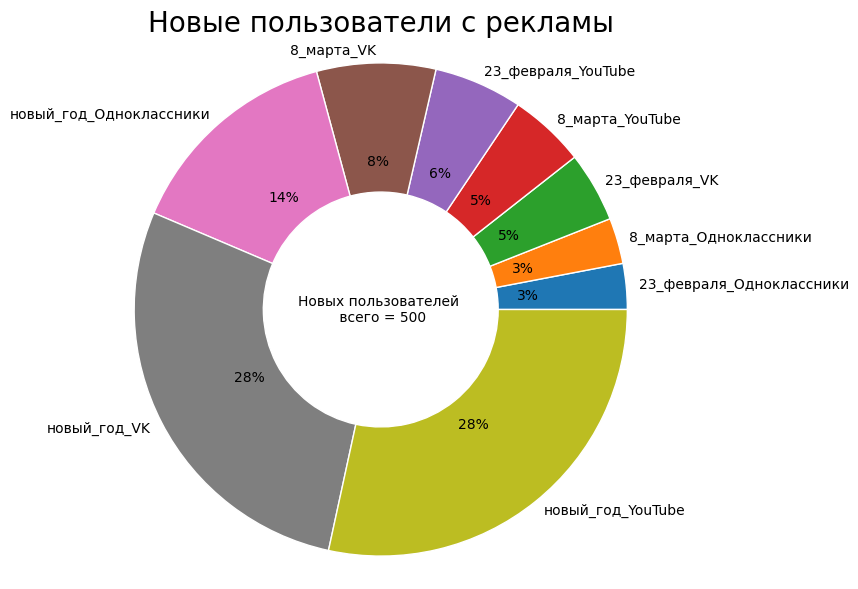

In [ ]:
# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(7,7))
# Рисуем кпуговую диаграмму
ax.pie(
    x =data_utm_count['utms_count'], 
    radius=2.1,                                 
    wedgeprops=dict(width=1.1, edgecolor='w'),
    labels = data_utm_count['utms'],    # задает название подписей
    labeldistance=1.05,    # на сколько далеко эти подписи от круга 
    autopct='%.0f%%'
)
# Название
ax.set_title('Новые пользователи с рекламы', loc='center', fontsize=20)
# Равные пропорции x и y
ax.axis("equal")

# Текст посередине
user_count = data_utm_count['utms_count'].sum()
sumstr = f'Новых пользователей \n всего = {user_count}'
ax.text(0., 0., sumstr, horizontalalignment='center', verticalalignment='center') # 0., 0. это параметры x и y равные нулю, чтобы подпись была в центре 
plt.show()

### Несколько графиков на одном фрейме

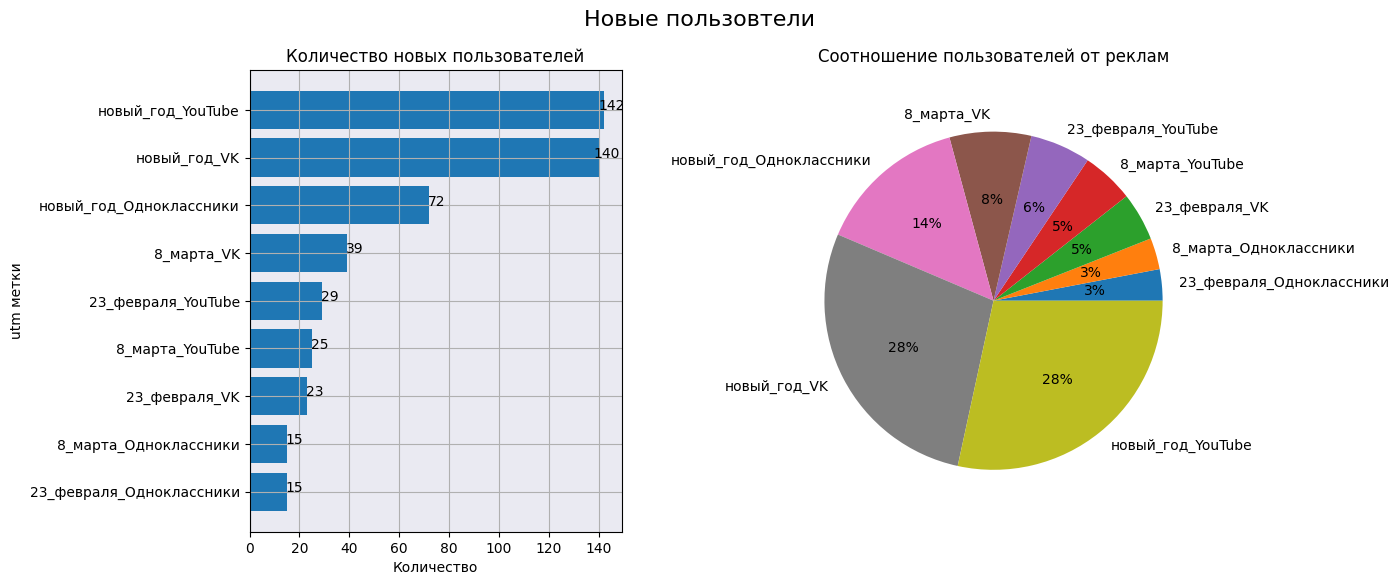

In [ ]:
# Создание объекта графика и осей
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6)) # subplots это неск графиков, укажем кол-во строк (горизонт) и кол-во столбцов (вертикаль) у нас два графика по вертикали
# Название всего фрейма
fig.suptitle('Новые пользовтели', fontsize=16)
# Отодвигаем графики друг от друга
fig.subplots_adjust(wspace=0.5)  # wspace означает по вертикали

# Создаем столбчатый график
ax[0].barh(data_utm_count['utms'], data_utm_count['utms_count'])
# Название для столбчатого графика
ax[0].set_title(label ='Количество новых пользователей', fontsize=12) # надо указать нужный индекс к объекту ax, ноль для первого графика
# Подпись к оси X
ax[0].set_xlabel('Количество')
# Подпись к оси Y
ax[0].set_ylabel('utm метки')
# Добавление подписей
for i, val in enumerate(data_utm_count['utms_count']):
    ax[0].text(val+3, i, str(val), ha='center')

# Создаем круговую диаграмму   
ax[1].pie(data_utm_count['utms_count'], labels = data_utm_count['utms'], autopct='%.0f%%') # надо указать нужный индекс к объекту ax, единицу для второго графика
# Задаем название для кругового графика
ax[1].set_title('Соотношение пользователей от реклам', fontsize=12)
ax[1].axis("equal") # equal - равный, одинаковый 

plt.show()

In [ ]:
# графики друг под другом

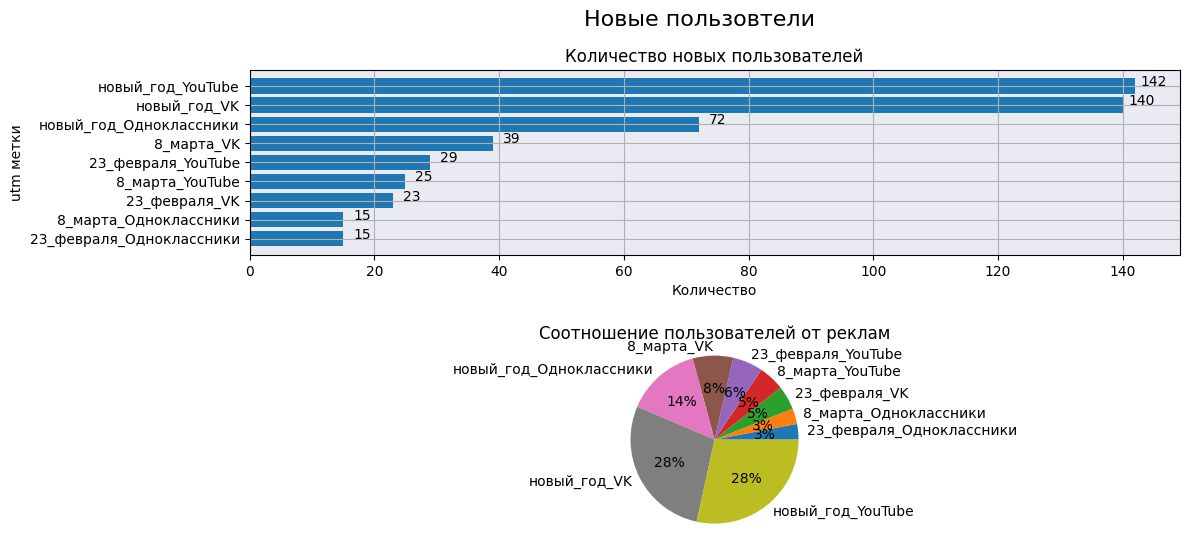

In [ ]:
# Создание объекта графика и осей
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(12,6)) # nrows=2,ncols=1 две строки и один столбец для графиков
# Название всего фрейма
fig.suptitle('Новые пользовтели', fontsize=16)
# Отодвигаем графики друг от друга
fig.subplots_adjust(hspace=0.5)  # hspace - означает по горизонтали, графики один над другим

# Создаем столбчатый график
ax[0].barh(data_utm_count['utms'], data_utm_count['utms_count'])
# Название для столбчатого графика
ax[0].set_title('Количество новых пользователей', fontsize=12)
# Подпись к оси X
ax[0].set_xlabel('Количество')
# Подпись к оси Y
ax[0].set_ylabel('utm метки')
# Добавление подписей
for i, val in enumerate(data_utm_count['utms_count']):
    ax[0].text(val+3, i, str(val), ha='center')

# Создаем круговую диаграмму   
ax[1].pie(data_utm_count['utms_count'], labels = data_utm_count['utms'], autopct='%.0f%%')
# Задаем название для кругового графика
ax[1].set_title('Соотношение пользователей от реклам', fontsize=12)
ax[1].axis("equal")

plt.show()

In [ ]:
# графики могут занимать неодинаковое пространство на фрейме (полотне, таблице)

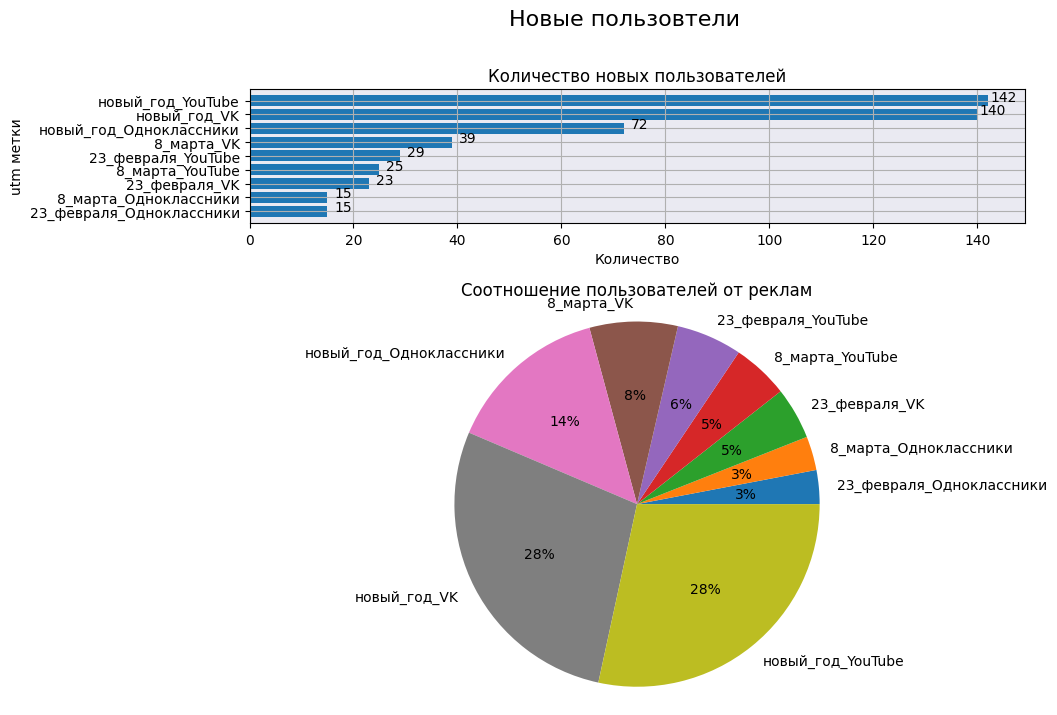

In [ ]:
# Создание объекта графика и осей
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),
                      height_ratios=[1,3]) # можно указать во сколько один график больше другого, height_ratios отношение между строками
# Название всего фрейма                                                                           # weight_ratios для столбцов
fig.suptitle('Новые пользовтели', fontsize=16)                                                    # второй больше, чем первый в 3 раза
# Отодвигаем графики друг от друга
fig.subplots_adjust(hspace=0.3)

# Создаем столбчатый график
ax[0].barh(data_utm_count['utms'], data_utm_count['utms_count'])
# Название для столбчатого графика
ax[0].set_title('Количество новых пользователей', fontsize=12)
# Подпись к оси X
ax[0].set_xlabel('Количество')
# Подпись к оси Y
ax[0].set_ylabel('utm метки')
# Добавление подписей
for i, val in enumerate(data_utm_count['utms_count']):
    ax[0].text(val+3, i, str(val), ha='center')

# Создаем круговую диаграмму   
ax[1].pie(data_utm_count['utms_count'], labels = data_utm_count['utms'], autopct='%.0f%%')
# Задаем название для кругового графика
ax[1].set_title('Соотношение пользователей от реклам', fontsize=12)
ax[1].axis("equal")

plt.show()

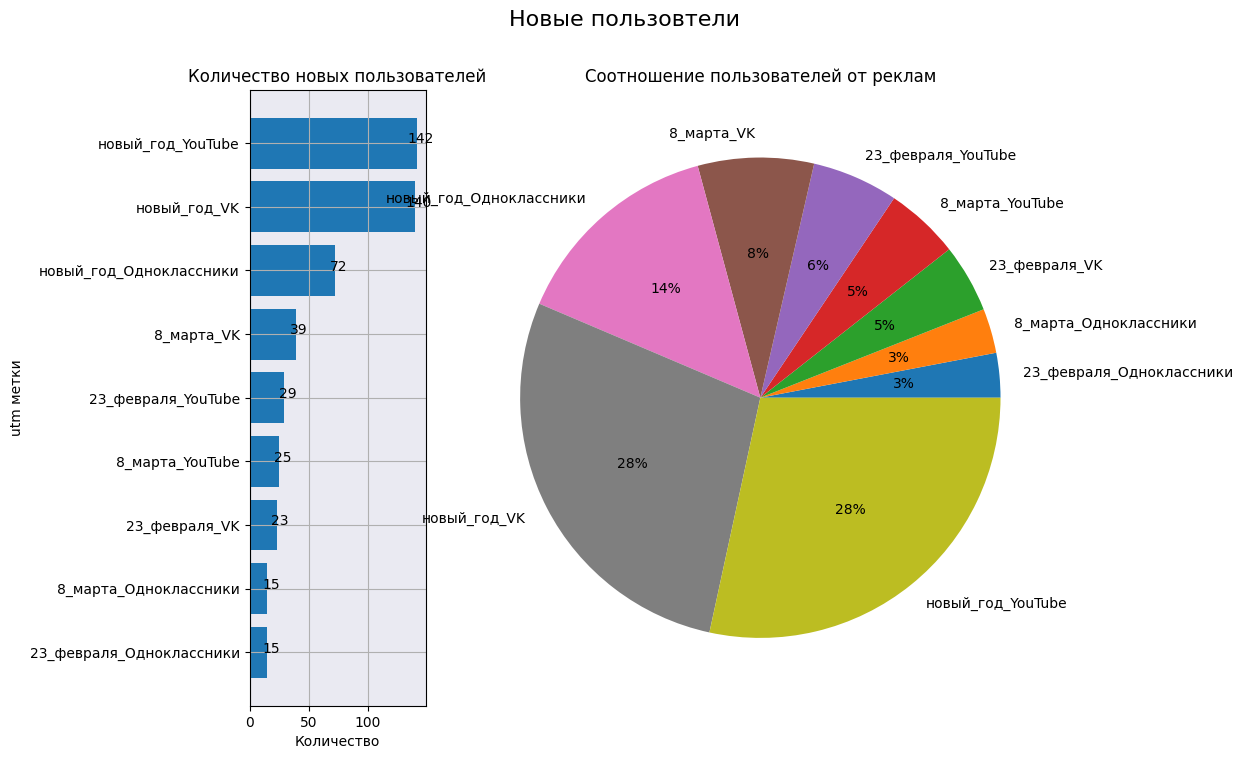

In [ ]:
# Создание объекта графика и осей
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,8),
                      width_ratios=[1,3])   # weight_ratios для столбцов  # второй график больше, чем первый в 3 раза
# Название всего фрейма
fig.suptitle(t='Новые пользовтели', fontsize=16)
# Отодвигаем графики друг от друга
fig.subplots_adjust(hspace=0.3)

# Создаем столбчатый график
ax[0].barh(data_utm_count['utms'], data_utm_count['utms_count'])
# Название для столбчатого графика
ax[0].set_title('Количество новых пользователей', fontsize=12)
# Подпись к оси X
ax[0].set_xlabel('Количество')
# Подпись к оси Y
ax[0].set_ylabel('utm метки')
# Добавление подписей
for i, val in enumerate(data_utm_count['utms_count']):
    ax[0].text(val+3, i, str(val), ha='center')

# Создаем круговую диаграмму   
ax[1].pie(data_utm_count['utms_count'], labels = data_utm_count['utms'], autopct='%.0f%%')
# Задаем название для кругового графика
ax[1].set_title('Соотношение пользователей от реклам', fontsize=12)
ax[1].axis("equal")

plt.show()

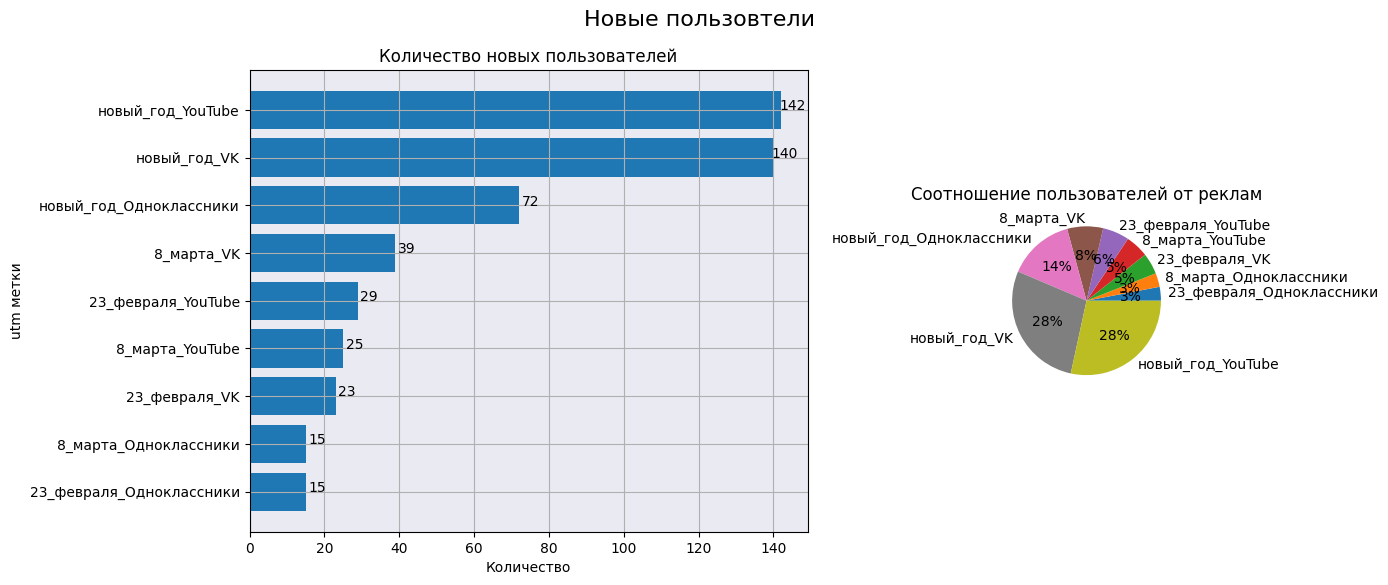

In [ ]:
# Создание объекта графика и осей
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),
                      gridspec_kw={'width_ratios':[3,1]})
# Название всего фрейма
fig.suptitle('Новые пользовтели', fontsize=16)
# Отодвигаем графики друг от друга
fig.subplots_adjust(wspace=0.5)

# Создаем столбчатый график
ax[0].barh(data_utm_count['utms'], data_utm_count['utms_count'])
# Название для столбчатого графика
ax[0].set_title('Количество новых пользователей', fontsize=12)
# Подпись к оси X
ax[0].set_xlabel('Количество')
# Подпись к оси Y
ax[0].set_ylabel('utm метки')
# Добавление подписей
for i, val in enumerate(data_utm_count['utms_count']):
    ax[0].text(val+3, i, str(val), ha='center')

# Создаем круговую диаграмму   
ax[1].pie(data_utm_count['utms_count'], labels = data_utm_count['utms'], autopct='%.0f%%')
# Задаем название для кругового графика
ax[1].set_title('Соотношение пользователей от реклам', fontsize=12)
# ax[1].axis("equal")
plt.show()

## Seaborn

In [25]:
import seaborn as sns

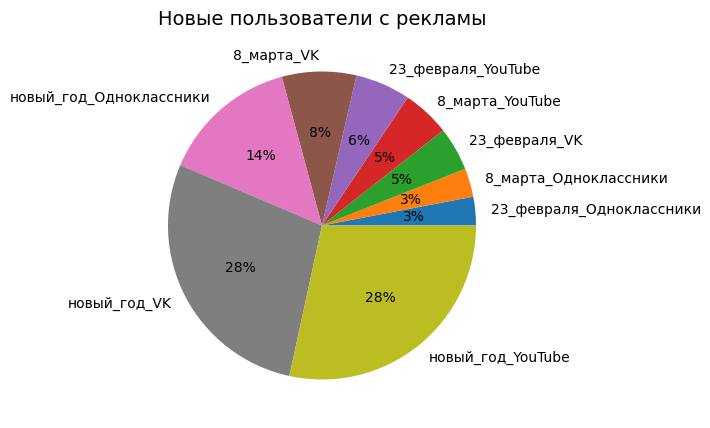

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем круговую диаграмму
plt.pie(data_utm_count['utms_count'], labels = data_utm_count['utms'], autopct='%.0f%%')
# Задаем название
plt.title('Новые пользователи с рекламы', fontsize=14)
plt.show()

In [26]:
sns.set() # применим стиль seaborn на все далее выводимые графики (этот стиль применится далее и к Matplotlib)

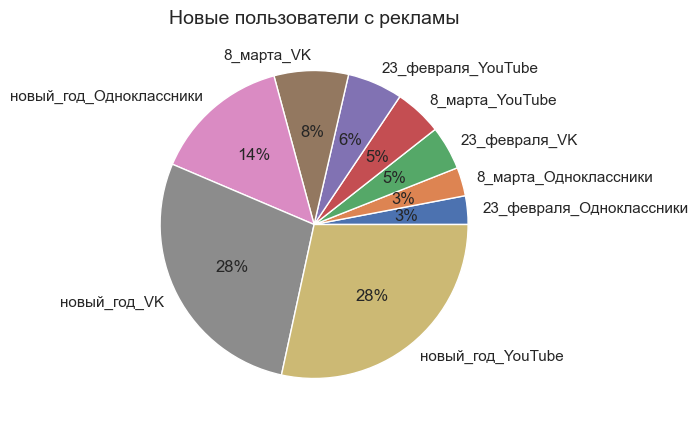

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем круговую диаграмму
plt.pie(data_utm_count['utms_count'], labels = data_utm_count['utms'], autopct='%.0f%%')
# Задаем название
plt.title('Новые пользователи с рекламы', fontsize=14)
plt.show()

### Линейный

In [62]:
data_user_count.head()

,date,user_count
0,2022-12-20,23
1,2022-12-21,22
2,2022-12-22,29
3,2022-12-23,26
4,2022-12-24,42


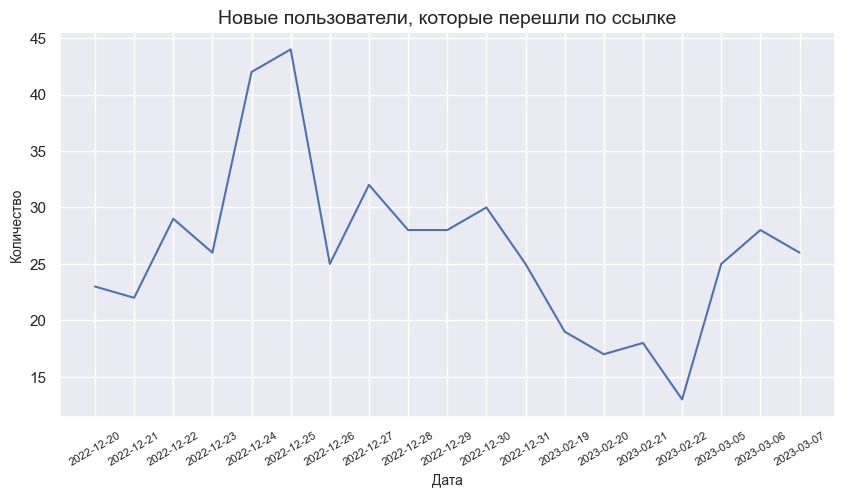

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем линию
sns.lineplot(x='date', y='user_count', data = data_user_count)
# Заголовок
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Дата', fontsize=10)
# Название оси X
plt.ylabel('Количество', fontsize=10)
plt.show()

In [63]:
data_user_by_source.head()

,date,utm_source,user_count
0,2022-12-20,VK,6
1,2022-12-20,YouTube,11
2,2022-12-20,Одноклассники,6
3,2022-12-21,VK,7
4,2022-12-21,YouTube,9


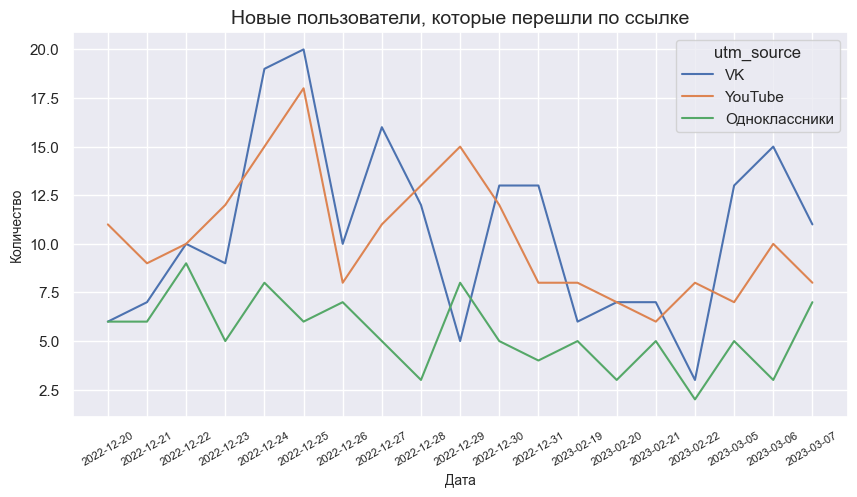

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем линию
sns.lineplot(x='date', y='user_count', data = data_user_by_source, hue='utm_source') # У lineplot есть полезный параметр hue, с помощью которого можно разбить одну линию на несколько
# Заголовок                                                        # легенда появилась автоматически
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Дата', fontsize=10)
# Название оси X
plt.ylabel('Количество', fontsize=10)
plt.show()

### Гисторамма

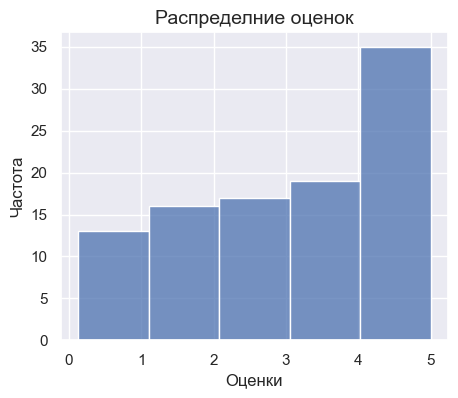

In [ ]:
# Задаем размер графика
plt.figure(figsize=(5,4))
# Рисуем гистограмму
sns.histplot(data=films_rating['avg_user_rating'], bins=5)
# Заголовок
plt.title('Распределние оценок', fontsize=14)
# Название оси X
plt.xlabel('Оценки')
# Название оси Y
plt.ylabel('Частота')
plt.show()

### Точечный

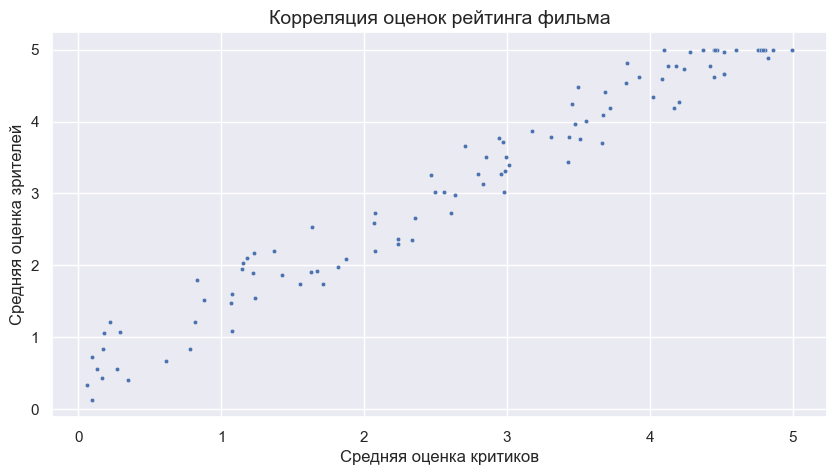

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем точечный график
sns.scatterplot(x = films_rating['avg_critic_rating'], y = films_rating['avg_user_rating'], 
                data = films_rating, s=10
               )
# Название
plt.title('Корреляция оценок рейтинга фильма', fontsize=14)
# Подпись к оси X
plt.xlabel('Средняя оценка критиков')
# Подпись к оси Y
plt.ylabel('Средняя оценка зрителей')
plt.show()

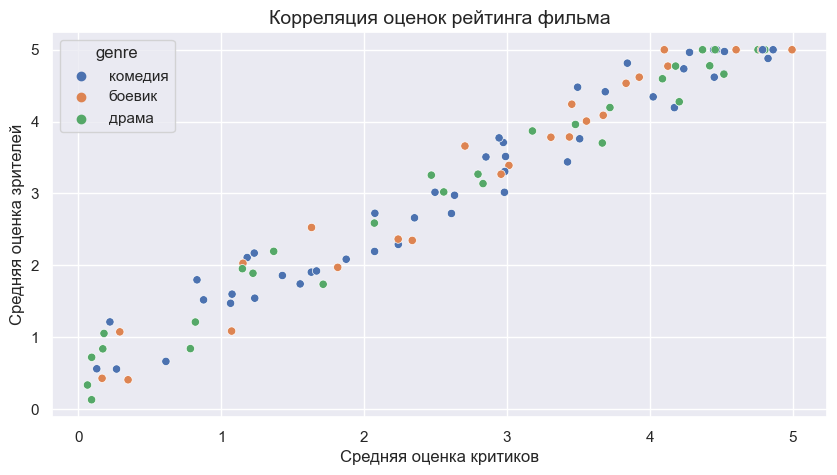

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем точечный график
sns.scatterplot(x = films_rating['avg_critic_rating'], 
                y = films_rating['avg_user_rating'], 
                data = films_rating,hue='genre')   # hue='genre' разбивает по жанрам, легенда автоматически появится
# Название
plt.title('Корреляция оценок рейтинга фильма', fontsize=14)
# Подпись к оси X
plt.xlabel('Средняя оценка критиков')
# Подпись к оси Y
plt.ylabel('Средняя оценка зрителей')
plt.show()

### Столбчатый

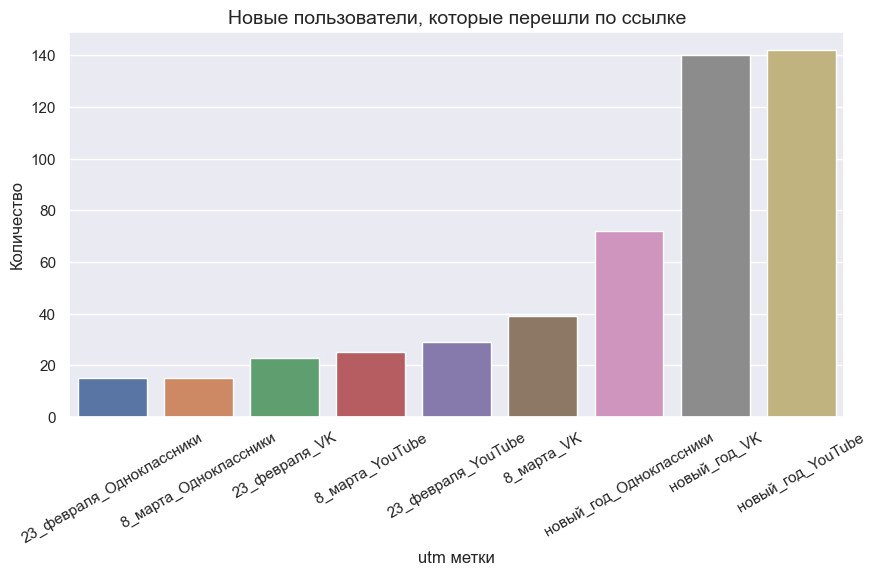

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем столбчатый график
sns.barplot(x=data_utm_count['utms'], y=data_utm_count['utms_count'])
# Название
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Подпись к оси X
plt.xticks(rotation=30)
plt.xlabel('utm метки')
# Подпись к оси Y
plt.ylabel('Количество')
plt.show()

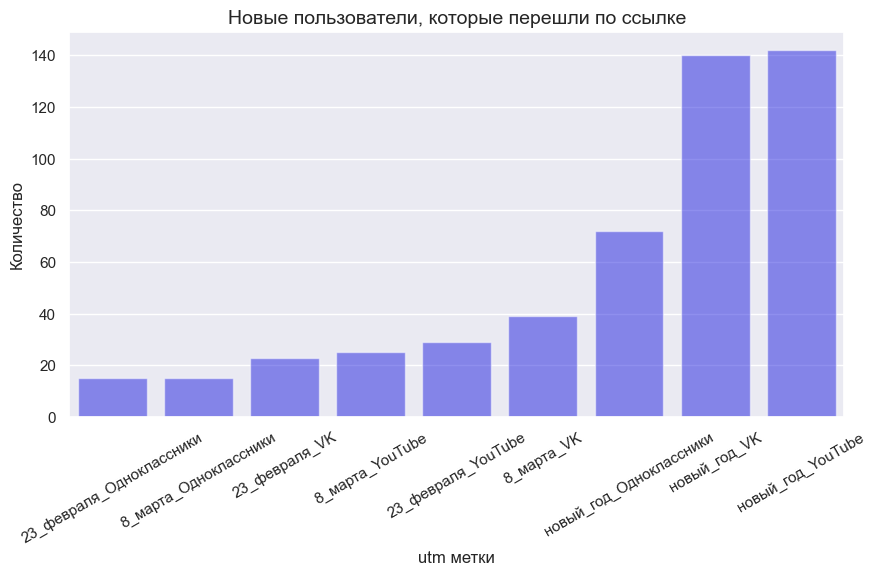

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем столбчатый график
sns.barplot(x=data_utm_count['utms'], y=data_utm_count['utms_count'],
            color='blue', alpha=0.5)
# Название
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Подпись к оси X
plt.xticks(rotation=30)
plt.xlabel('utm метки')
# Подпись к оси Y
plt.ylabel('Количество')
plt.show()

In [64]:
data_user_by_source.head()

,date,utm_source,user_count
0,2022-12-20,VK,6
1,2022-12-20,YouTube,11
2,2022-12-20,Одноклассники,6
3,2022-12-21,VK,7
4,2022-12-21,YouTube,9


In [ ]:
# в seaborn легко разбить столбцы на несколько, указав параметр hue, легенда добавится автоматически

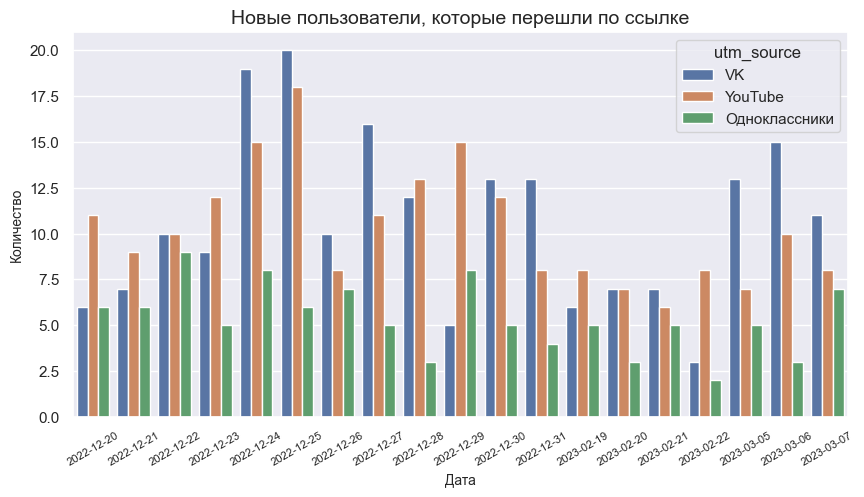

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем линию
sns.barplot(x='date', y='user_count', data = data_user_by_source, hue='utm_source')
# Заголовок
plt.title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Дата', fontsize=10)
# Название оси X
plt.ylabel('Количество', fontsize=10)
plt.show()

Heatmap - это график для визуализации матрицы данных. С помощью него удобно строить сводные таблицы, а также отображать корреляцию данных цифрами.  Задается с помощью функции heatmap

In [65]:
# построим сводную таблицу

data_pivot = data.pivot_table(
    index='utm_campaign', # в id строк отправим компанию
    columns='utm_source', # в колонки источник трафика
    values='user_id',     # в качестве значений укажем пользователей 
    aggfunc='count'       # в качестве агрегирующей функции укажем кол-во
)

In [66]:
data_pivot

utm_source,VK,YouTube,Одноклассники
utm_campaign,,,
23_февраля,23,29,15
8_марта,39,25,15
новый_год,140,142,72


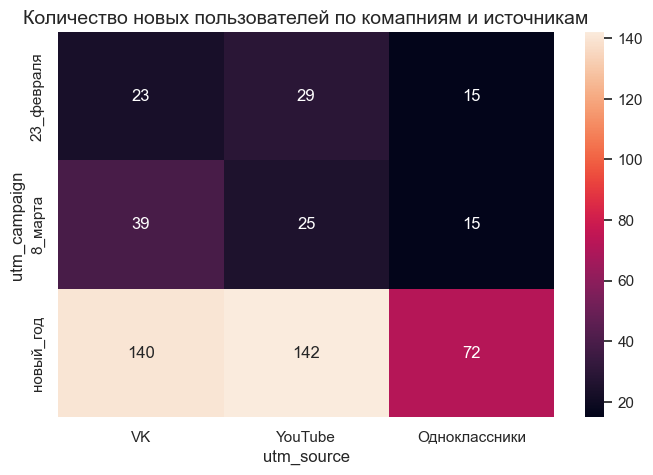

In [ ]:
# Задаем размер графика
plt.figure(figsize=(8,5))
# Рисуем heatmap
sns.heatmap(data_pivot, annot=True, fmt="g") # annot=True на матрице появятся значения, fmt="g" в каком виде выведутся подписи
# Заголовок                                                                            # значение g это целочисленный тип
plt.title('Количество новых пользователей по комапниям и источникам', fontsize=14)
plt.show()

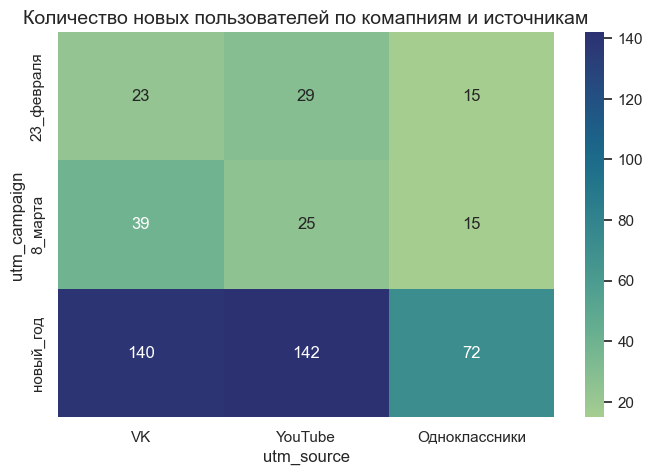

In [ ]:
# Задаем размер графика
plt.figure(figsize=(8,5))
# Рисуем heatmap
sns.heatmap(data=data_pivot, annot=True, fmt="g", cmap='crest') # cmap='crest' меняет цвета матрицы, самая популярная палитра это crest
# Заголовок
plt.title('Количество новых пользователей по комапниям и источникам', fontsize=14)
plt.show()

Pairplot - удобный график для первичного анализа. Он покажет, как столбцы коррелируют друг с другом, на их пересечении, а на пересечении столбца с самим собой будет построена гистограмма, которая покажет распределение данных. Задается с помощью функции pairplot

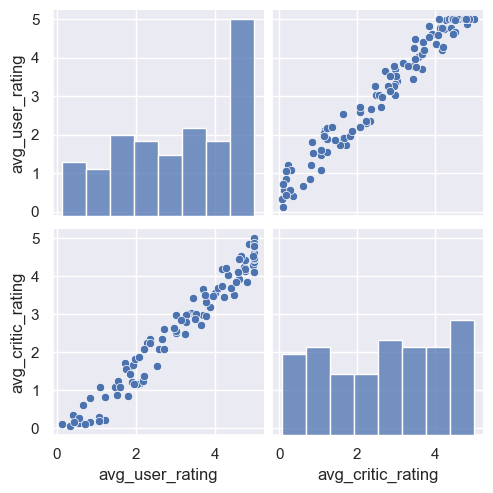

In [ ]:
# Рисуем pairplot
sns.pairplot(films_rating[['avg_user_rating', 'avg_critic_rating']])

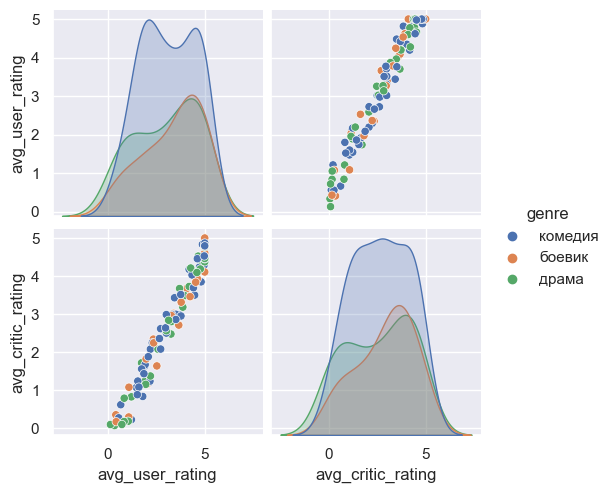

In [ ]:
# Рисуем pairplot
sns.pairplot(data=films_rating[['avg_user_rating', 'avg_critic_rating', 'genre']], hue='genre') # hue распределил по жанру и цветам, легенда автоматически 

Countplot - график, для которого не нужно делать предварительный вычислений, он сагрегирует данные сам. Задается с помощью функции countplot

In [ ]:
data.head()

,user_id,date,utm_campaign,utm_source,register,pay,utms
0,0,2022-12-20,новый_год,VK,1.0,0,новый_год_VK
1,1,2022-12-20,новый_год,YouTube,1.0,1,новый_год_YouTube
2,2,2022-12-20,новый_год,YouTube,1.0,0,новый_год_YouTube
3,3,2022-12-20,новый_год,YouTube,1.0,1,новый_год_YouTube
4,4,2022-12-20,новый_год,Одноклассники,0.0,0,новый_год_Одноклассники


<Axes: xlabel='utm_campaign', ylabel='count'>

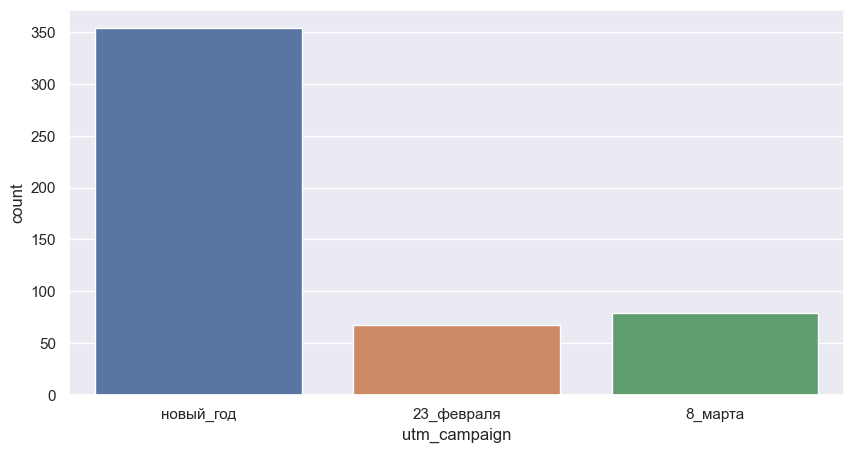

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="utm_campaign") # x это поле, по которому будет агрегировано кол-во

<Axes: xlabel='utm_campaign', ylabel='count'>

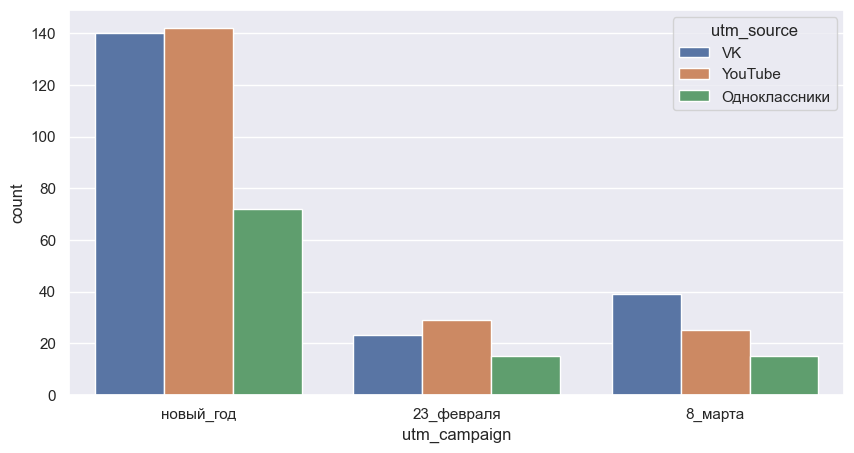

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="utm_campaign", hue='utm_source') # добавим в hue источник

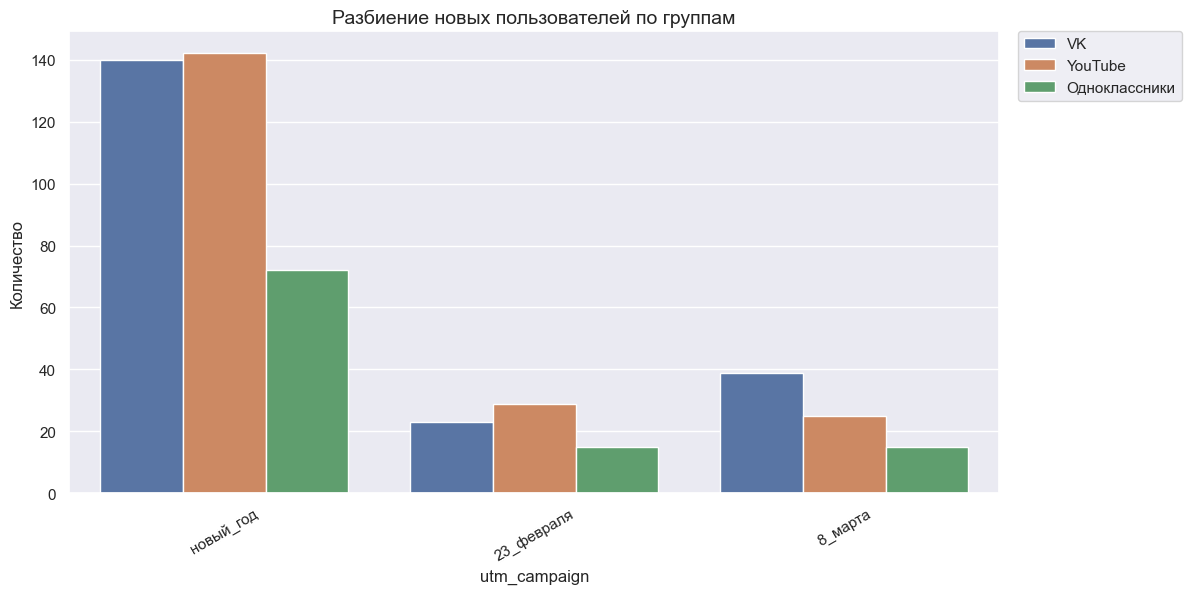

In [ ]:
# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(12,6)) # Графики в Seaborn можно строить и через subplots
# Нарисовать столбцы
sns.countplot(data=data, x="utm_campaign", hue='utm_source', ax=ax) # Для этого в самой функции, которая строит график, нужно передать параметр ax

# Настраиваем легенду и заголовок
ax.legend(loc=(1.02, 0.85))
ax.set_title('Разбиение новых пользователей по группам', fontsize=14)
# Поворачиваем подпись на осях
ax.tick_params(axis='x', labelrotation=30)
# Подпись к оси Y
ax.set_ylabel('Количество')

plt.show()

### И matplotlib и seaborn на одном фрейме

In [ ]:
# Разбёремся, в каких случаях лучше использовать Matplotlib, а в каких — Seaborn. 
# Если нужно быстро создать красивый график, используем Seaborn. 
# Если нужна максимальная гибкость и полный контроль над внешним видом графика, используем Matplotlib.

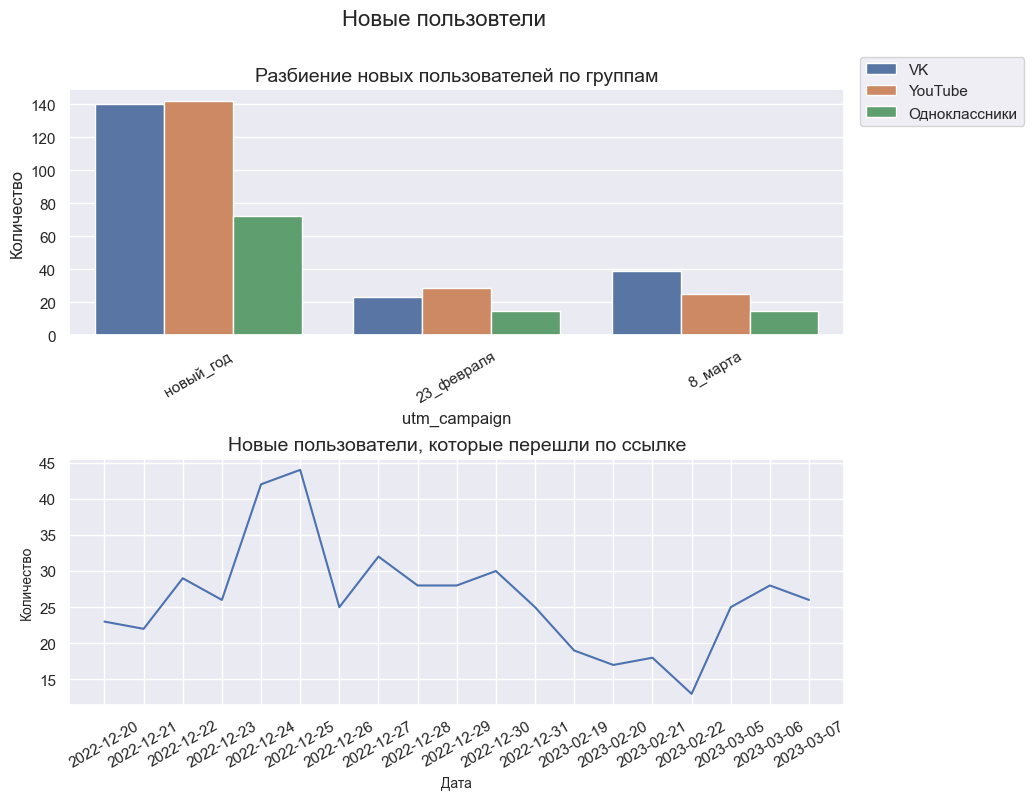

In [ ]:
# Создание объекта графика и осей
fig, ax = plt.subplots(2, 1, figsize=(10,8))
# Название всего фрейма
fig.suptitle('Новые пользовтели', fontsize=16)
# Отодвигаем графики друг от друга
fig.subplots_adjust(hspace=0.5)

# Нарисовать столбцы
sns.countplot(data=data, x="utm_campaign", hue='utm_source', ax=ax[0]) # ax, который равен ax с индексом 0
# Настраиваем легенду и заголовок
ax[0].legend(loc=(1.02, 0.85))
ax[0].set_title('Разбиение новых пользователей по группам', fontsize=14)
# Поворачиваем подпись на осях
ax[0].tick_params(axis='x', labelrotation=30)
# Подпись к оси Y
ax[0].set_ylabel('Количество')


ax[1].plot('date', 'user_count', data = data_user_count)
# Заголовок
ax[1].set_title('Новые пользователи, которые перешли по ссылке', fontsize=14)
# Поворачиваем подписи на оси x
ax[1].tick_params(axis='x', labelrotation=30)
# Название оси X
ax[1].set_xlabel('Дата', fontsize=10)
# Название оси Y
ax[1].set_ylabel('Количество', fontsize=10)

plt.show()